In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
wine = pd.read_csv('datasets/wine/wine.csv')

In [3]:
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


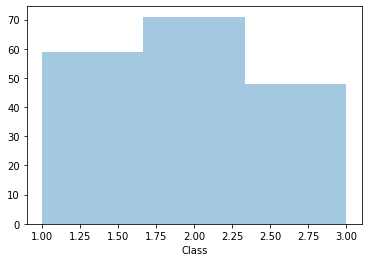

In [5]:
sns.distplot(wine['Class'], kde=False)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [8]:
#sns.pairplot(wine)

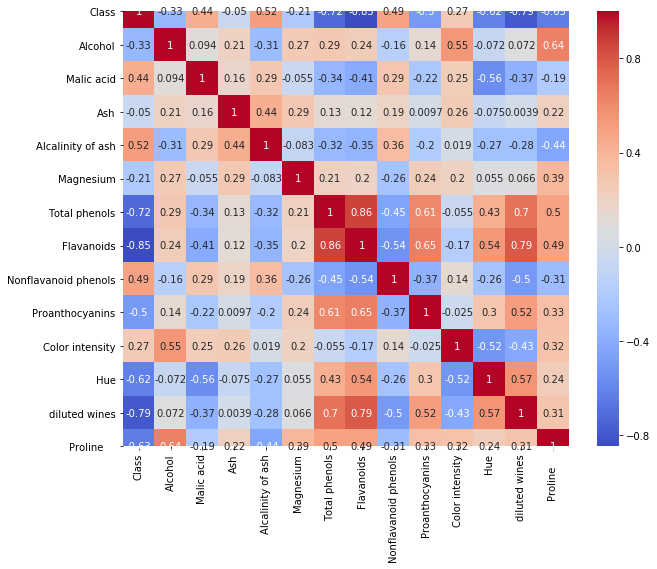

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), cmap='coolwarm', annot=True)

In [10]:
wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [11]:
wine['Class'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
X = wine.drop(['Class'], axis=1)
y = wine['Class']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
b = 0
c = 0

for i in range(42,102):
    ran=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=ran)
    lw = LogisticRegression()
    lw.fit(X_train, y_train)
    pred = lw.predict(X_test)
    a = r2_score(y_test, pred)
    print(f'r2 score for random state of {ran} is {a}')
    
    if a>b:
        b = a
        c=ran
print(f'max r2 score for random state of {c} is {b}')

r2 score for random state of 42 is 1.0
r2 score for random state of 43 is 0.9728506787330317
r2 score for random state of 44 is 0.9350961538461539
r2 score for random state of 45 is 0.9159751037344398
r2 score for random state of 46 is 0.8670769230769231
r2 score for random state of 47 is 0.9138755980861244
r2 score for random state of 48 is 0.9703296703296703
r2 score for random state of 49 is 0.9246336357292393
r2 score for random state of 50 is 0.935445307830245
r2 score for random state of 51 is 0.8477157360406091
r2 score for random state of 52 is 0.9318181818181818
r2 score for random state of 53 is 0.905373831775701
r2 score for random state of 54 is 0.9142403388035998
r2 score for random state of 55 is 0.9672528805336568
r2 score for random state of 56 is 0.9192221391174271
r2 score for random state of 57 is 1.0
r2 score for random state of 58 is 0.8329207920792079
r2 score for random state of 59 is 0.9712918660287081
r2 score for random state of 60 is 0.9373549883990719
r2 sco

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      0.95      0.95        22
           3       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54

[[18  1  0]
 [ 0 21  1]
 [ 0  0 13]]


In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X,y,cv=5,scoring='r2').mean()

0.9360443692423388

In [18]:
#boosting accuracy

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier()
param_grid = {'n_estimators':[10,100,500,1000], 'learning_rate':[0.001,0.01,0.1,1]}
grid = GridSearchCV(gbr, param_grid, cv=5, refit=True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.3s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.3s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.3s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.4s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.4s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] ............ learning_rate=0.001, n_estimators=500, total=   1.5s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] ............ learning_rate=0.001, n_estimators=500, total=   1.3s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] .

[CV] ................ learning_rate=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] ................ learning_rate=1, n_estimators=500, total=   0.9s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] ................ learning_rate=1, n_estimators=500, total=   0.8s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [20]:
grid_predictions = grid.predict(X_test)

In [21]:
print(confusion_matrix(y_test,grid_predictions))

[[19  0  0]
 [ 4 16  2]
 [ 0  0 13]]


In [22]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.83      1.00      0.90        19
           2       1.00      0.73      0.84        22
           3       0.87      1.00      0.93        13

    accuracy                           0.89        54
   macro avg       0.90      0.91      0.89        54
weighted avg       0.91      0.89      0.88        54



In [25]:
print(grid.best_params_)

{'learning_rate': 1, 'n_estimators': 10}


In [36]:
#saving model
from sklearn.externals import joblib
joblib.dump(lw, 'lw_wine.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lw_wine.pkl']